 %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from numpy import sqrt,sin, cos, pi

In [2]:
from qutip import *

# Cavity OptoMechanics: 3 Parttite coupling

## Energy levels for Numerical diagonalization of the Hamiltonian 

In [4]:
#Eq (5) in refrence:
#"Fully coupled hybrid cavity optomechanics: Quantum interferences and correlations"

In [3]:
a=destroy(2)
p=basis(2,1)
#a.unit()*basis(3,1)
N_pol= tensor(a.dag()*a,qeye(2)) + tensor(qeye(2) , sigmap()*sigmam())
N_pol
#a.dag()
#sigmap()
g=sigmam()*p
#spre()
#sigmap()
m= range(1,8)
m[0]

1

In [17]:
#----------------parameters
#omega_m=1.0*(10**6)
#delta=- omega_m
#gamma=1*(10**-7)*omega_m

Nc = 20;      #### photons ##
Nm = 20;     ## phonon dimension  

wc= 10.0 
wm= 1.25 
wa=wc                  # resonance

g_cm = wm/20.0         # cavity-phonon coupling
g_am = - wm/40.0       # atom_phonon coupling 
g_ac = wm/2.0         # cavity-atom coupling
g_polr= wm/10.0         # polariton-mechanics coupling

#g=(10**-6)* omega_m    # coupling strength
#G=0.02 *omega_m        # coupling?

#t_max = 0.003;
a = tensor(destroy(Nc),qeye(Nm),qeye(2))     # cavity anihilation operator
b = tensor(qeye(Nc), destroy(Nm),qeye(2))    # phonon anihilation operator



sz = tensor(qeye(Nc), qeye(Nm), sigmaz())
sigma_m = tensor(qeye(Nc), qeye(Nm), sigmam())
sigma_p = tensor(qeye(Nc), qeye(Nm), sigmap())

N_pol= a.dag()*a + sigma_p*sigma_m    # atom-cavity or polariton oprator
#sz2 = tensor(qeye(2), sigmaz(), qeye(2))
#sx2 = tensor(qeye(2), sigmax(), qeye(2))

#sz3 = tensor(qeye(2), qeye(2), sigmaz())
#sx3 = tensor(qeye(2), qeye(2), sigmax())

g_aclist = np.linspace(0,1.5,30)          # g_ac range 

evals_mat = np.zeros((len(g_aclist),2*Nc*Nm))

idx = 0

for g_ac in g_aclist:

   
    H = wc * a.dag() * a + wa * sz/2 + wm * b.dag() * b + 1j *  g_ac * (sigma_p * a - sigma_m * a.dag()) \
       - g_cm * a.dag()* a * (b.dag() + b) - g_am * sz * (b.dag() + b)
            
            
    evals, ekets = H.eigenstates()
    evals_mat[idx,:] = np.real(evals)
    
    idx +=1
len(g_aclist)
len(evals)
evals[0]
evals_mat[0,2]

-2.500781250000024

In [99]:
evals_mat[3,0]

-50.00078124999996

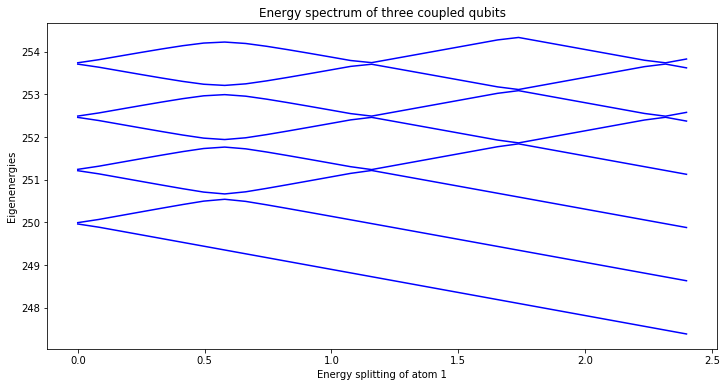

In [105]:
fig, ax = plt.subplots(figsize=(12,6))

for n in [100,101,102,103,104,105,106,107]:
    ax.plot(2*g_aclist / (wm), (evals_mat[:,n]), 'b')

ax.set_xlabel('Energy splitting of atom 1')
ax.set_ylabel('Eigenenergies')
#ax.set_ylim([-10,0])

ax.set_title('Energy spectrum of three coupled qubits');

In [33]:
Nc = 20;      #### photons ##
Nm = 20;     ## phonon dimension  

wc= 10.0 
wm= 1.25 
wa=wc                  # resonance

g_cm = wm/20.0         # cavity-phonon coupling
g_am = - wm/40.0       # atom_phonon coupling 
g_ac = wm/2.0         # cavity-atom coupling
g_polr= wm/10.0         # polariton-mechanics coupling

H = wc * a.dag() * a + wa * sz/2 + wm * b.dag() * b + 1j *  g_ac * (sigma_p * a - sigma_m * a.dag()) \
   - g_cm * a.dag()* a * (b.dag() + b) - g_am * sz * (b.dag() + b)
            
            
evals, ekets = H.eigenstates()
#evals_mat[idx,:] = np.real(evals)

NameError: name 'a' is not defined

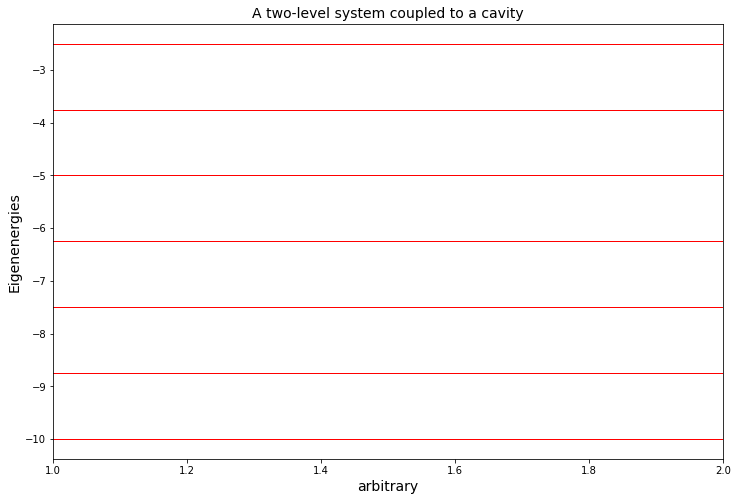

In [119]:
fig, ax = plt.subplots(figsize=(12,8))

for n in [0,1,2,3,4,5,6]:     # range(7)
    #ax.plot(x , (evals_n[:,n])/omega_a , 'r')
    plt.axhline(y=evals[n], color='r' , lw=1.0)
    #OR
    #ax.axhline(y=evals[n], color='r' ) #, lw=1.5)
    
plt.xlim([1, 2])   # defult range is [0,1], no need to define this!
# OR
#ax.set_xlim([0,1])
#ax.legend(('xy','vt'))
ax.set_xlabel('arbitrary',fontsize=14)
ax.set_ylabel('Eigenenergies',fontsize=(14))

ax.set_title('A two-level system coupled to a cavity',fontsize=(14));

# Energy levels for analytical Eqs

In [9]:
s = list(range(1,8))
s

[1, 2, 3, 4, 5, 6, 7]

In [31]:
wc= 1e3 
wm= 10 
#wa=1.2 * wc
wa=wc                  # resonance

g_cm = wm/20.0         # cavity-phonon coupling
g_am = - wm/40.0       # atom_phonon coupling 
g_ac = wm #/2.0         # cavity-atom coupling
g_polr= wm/10.0         # polariton-mechanics coupling

g_aclist=np.linspace(0.0,2.5,60) * wm/2          # g_ac range 
g_aclist[25]

5.296610169491524

In [3]:
#N=4                   # for N levels
wc= 1e3 
wm= 10 
#wa=1.2 * wc
wa=wc                  # resonance

g_cm = wm/20.0         # cavity-phonon coupling
g_am = - wm/40.0       # atom_phonon coupling 
g_ac = wm /2.0         # cavity-atom coupling
g_polr= wm/10.0         # polariton-mechanics coupling

g_aclist=np.linspace(0.0,2.5,60) * wm/2          # g_ac range 


idx=0
#E_Gf=[]
#E_Gf = np.zeros((len(g_aclist),6,7))
#E_nfp = np.zeros((len(g_aclist),6,7))
#E_nfm = np.zeros((len(g_aclist),6,7))

E_Gf = np.zeros((len(g_aclist),8))
E_nfp = np.zeros((len(g_aclist),8))
E_nfm = np.zeros((len(g_aclist),8))

E_n = np.zeros((len(g_aclist),8))

n=1
for g_ac in g_aclist:
    
    #n=0
    #if n<N:
    #for n in range(1,7):
    E_G = n *wc - ((g_cm**2)/wm) * (n-1/2) - g_ac * sqrt(n)   
    #E_Gf[idx,0] = E_G
    E_n[idx,0] = E_G
    for m in range(1,8):   
            
          
           
            
        E_np = n * wc - (n-1/2) * (g_cm**2)/wm + wm * (m-1/2) \
        + sqrt((1/4)*(2*g_ac*sqrt(n)-wm)**2 + (1/4)* m * g_polr**2)
    

        E_nm = n * wc - ((g_cm**2)/wm) *(n-1/2) + wm * (m-1/2)  \
        - sqrt( (1/4)* (2*g_ac*sqrt(n)-wm)**2 + (1/4)* m * g_polr**2 )  
            
            
        
        E_nfp[idx,m] = E_np
        E_nfm[idx,m] = E_nm
            
        E_n[idx,m] = E_np + E_nm
            #E_Gf.append(E_G)
    #print(idx)
    idx +=1     
    
#type(E_Gf)
len((E_Gf)[:,1])
#len(E_Gf[1,1,:])
E_Gf[:,0]
E_n[:,1]
#E_nfp[2,3]
#len(E_nfp[2,:])
#E_nfm[55,0]
#list(range(1,8))
g_aclist[30]
#g_ac
#wm
#n * wc - (n-1/2) * (g_cm**2)/wm + wm * (m-1/2)
#n * wc - ((g_cm**2)/wm) *(n-1/2) + wm * (m-1/2)
#sqrt((1/4)*(2*g_ac*sqrt(n)-wm)**2 + (1/4)* m * g_polr**2)
#sqrt( (1/4)* (2*g_ac*sqrt(n)-wm)**2 + (1/4)* m * g_polr**2 )

6.3559322033898304

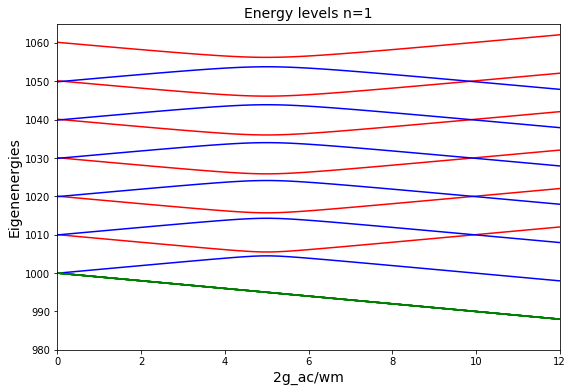

In [10]:
#fig, ax = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(1,1, figsize=(9,6))


#for n in range(len(g_aclist)):
    
for m in range(0,7):     # range(7)
        
    #ax.plot(g_aclist , ( E_Gf[:,m]), 'b')    
    ax.plot(g_aclist , (E_nfm[:,m]), 'b', g_aclist,E_nfp[:,m] ,'r',g_aclist, E_n[:,0],'g',)
    
    #for m in [0,1,2,3,4,5,6]: 
    #ax.plot(2*g_aclist / (wm), ( E_nfp[:,m]+ E_nfm[:,m] +  E_Gf[:,0]), 'b')
    
#n=m=1
#
    #ax.plot(x , (evals_n[:,n])/omega_a , 'r')
    #plt.axhline(y=evals[n], color='r' , lw=1.0)
    #OR
    #ax.axhline(y=evals[n], color='r' ) #, lw=1.5)
#print('\n') 
    
#plt.xlim([1, 2])   # defult range is [0,1], no need to define this!
# OR
ax.set_ylim([980,1065])
ax.set_xlim([0,12])
#ax.legend(('xy','vt'))
ax.set_xlabel('2g_ac/wm',fontsize=14)
ax.set_ylabel('Eigenenergies',fontsize=(14))
ax.set_title('Energy levels n=1',fontsize=(14));
# plt.axis([0, 12, 900, 2500])     # [xmin, xmax, ymin, ymax]
#ax[1].set_xlabel('arbitrary',fontsize=14)
#ax[1].set_ylabel('Eigenenergies',fontsize=(14))
#ax[1].set_title('A two-level system coupled to a cavity',fontsize=(14));